In [16]:
import pandas as pd
import numpy as np

In [2]:
import sys

In [4]:
sys.path.append("../")

In [5]:
import src.main as sp

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 1- Spotify Top 200 Charts (2020-2021)

In [3]:
df_spotify = pd.read_csv("../data/spotify_dataset.csv", index_col = 0 )

In [ ]:
df_spotify=sp.abrir_csv("../data/spotify_dataset.csv")

In [4]:
df_spotify.head(1)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B


In [5]:
df_spotify.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [6]:
df_spotify.shape

(1556, 22)

## 1.2 Merge with "Spotify Artist Metadata Top 10k" dataset to add Age, gender and location of artists

In [7]:
df_a = pd.read_csv("../data/spotify_artists.csv", index_col = 0 )

In [ ]:
df_a=sp.abrir_csv("../data/spotify_artists.csv")

In [8]:
df_a.head() #voy a coger las columnas que me interesan

,index,artist,gender,age,type,country,city_1,district_1,city_2,district_2,city_3,district_3
0,0,Drake,male,33,person,CA,NaN,NaN,Toronto,NaN,NaN,NaN
1,1,Post Malone,male,25,person,US,NaN,NaN,Syracuse,NaN,NaN,NaN
2,2,Ed Sheeran,male,29,person,GB,NaN,NaN,Halifax,NaN,NaN,NaN
3,3,J Balvin,male,35,person,CO,NaN,NaN,Medellín,NaN,NaN,NaN
4,4,Bad Bunny,male,26,person,PR,NaN,NaN,San Juan,NaN,NaN,NaN


In [9]:
df_a.duplicated().sum()

1

In [10]:
df_a=df_a.drop_duplicates(keep='first')

In [11]:
df_nul=pd.DataFrame((df_a.isnull().sum() * 100) / df_a.shape[0])
df_nul[df_nul[0]>0] #above 50% nulls wont interest me

,0
gender,17.521752
type,17.521752
country,33.543354
city_1,93.069307
district_1,99.879988
city_2,67.266727
district_2,98.119812
city_3,97.929793
district_3,99.829983


In [12]:
df_a.columns

Index(['index', 'artist', 'gender', 'age', 'type', 'country', 'city_1',
       'district_1', 'city_2', 'district_2', 'city_3', 'district_3'],
      dtype='object')

In [13]:
df_a=df_a[['artist', 'gender', 'age', 'type', 'country']]

voy a juntar los dos dataframes por el artista(por inner join) y luego veo que hago con los nulls

In [14]:
df_spotify.head(1)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B


In [15]:
df_a.head(1)

,artist,gender,age,type,country
0,Drake,male,33,person,CA


In [16]:
df = df_spotify.merge(df_a, left_on= "Artist", right_on="artist", how="inner")
df.head(2)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,artist,gender,age,type,country
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,Måneskin,mixed,4,group,NaN
1,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",2021-03-19,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,95,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db,Måneskin,mixed,4,group,NaN


In [17]:
df.drop(['artist'], axis = 1, inplace=True)

In [18]:
df.columns = df.columns.str.replace(' ', '_')
df.columns=[i.title() for i in df.columns]

# 2- Cleaning

In [19]:
df.shape #lets see which information interest me 

(1157, 26)

In [20]:
df.duplicated().sum()

14

In [21]:
df.drop_duplicates(keep='first', inplace=True)

## 2.1 Column Types

In [22]:
df.dtypes #Some of them aren´t right

Highest_Charting_Position     int64
Number_Of_Times_Charted       int64
Week_Of_Highest_Charting     object
Song_Name                    object
Streams                      object
Artist                       object
Artist_Followers             object
Song_Id                      object
Genre                        object
Release_Date                 object
Weeks_Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration_(Ms)                object
Valence                      object
Chord                        object
Gender                       object
Age                           int64
Type                         object
Country                      object
dtype: object

In [23]:
df.loc[:,"Popularity":"Valence"].head(1) #this columns should me numeric

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence
0,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589


In [24]:
df["Popularity1"]=pd.to_numeric(df["Popularity"], errors='coerce') 

In [25]:
df["Popularity1"].isnull().sum()

9

In [26]:
null = df["Popularity1"].isnull()
df_null = df.loc[null, :]

In [27]:
df_null.head(1) #because they are blank values

,Highest_Charting_Position,Number_Of_Times_Charted,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Song_Id,Genre,Release_Date,Weeks_Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Gender,Age,Type,Country,Popularity1
5,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,,2021-07-23--2021-07-30,,,,,,,,,,,,male,16,person,AU,NaN


In [28]:
blank = df.apply(lambda x: x.str.isspace().any(), axis=1)
df_blank = df.loc[blank, :]

In [29]:
df_blank.shape #same as Nas

(9, 27)

In [30]:
df["Popularity"]=df["Popularity1"]

In [31]:
df.drop(["Popularity1"], axis = 1, inplace=True) 

In [32]:
df_float=df.loc[:,"Danceability":"Valence"]

In [33]:
df_float=df_float.apply(pd.to_numeric, errors='coerce')

In [34]:
df.loc[:,"Danceability":"Valence"]=df_float

In [35]:
df.dtypes #now we are good

Highest_Charting_Position      int64
Number_Of_Times_Charted        int64
Week_Of_Highest_Charting      object
Song_Name                     object
Streams                       object
Artist                        object
Artist_Followers              object
Song_Id                       object
Genre                         object
Release_Date                  object
Weeks_Charted                 object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration_(Ms)                float64
Valence                      float64
Chord                         object
Gender                        object
Age                            int64
Type                          object
Country                       object
dtype: object

## 2.2 Null values

In [36]:
df_nul=pd.DataFrame((df.isnull().sum() * 100) / df.shape[0])
df_nul[df_nul[0]>0] #Objective of the null values is to remove only when <1% but I will first investigate the data for authenticity

,0
Popularity,0.787402
Danceability,0.787402
Energy,0.787402
Loudness,0.787402
Speechiness,0.787402
Acousticness,0.787402
Liveness,0.787402
Tempo,0.787402
Duration_(Ms),0.787402
Valence,0.787402


In [38]:
df.to_csv("../data/df_spotify1.csv") 

## 2.3 Data Manipulation

### 2.3.1 Genre

In [39]:
df["Genre"].head(5)

0    ['indie rock italiano', 'italian pop']
1    ['indie rock italiano', 'italian pop']
2    ['indie rock italiano', 'italian pop']
3    ['indie rock italiano', 'italian pop']
4                    ['australian hip hop']
Name: Genre, dtype: object

In [40]:
df["Genre"]=df["Genre"].str.split(",")

In [41]:
import re

In [42]:
def genre(column):
    listi=[]
    for i in column:
        y= re.findall("[a-z]+.*\w+", str(i))
        try:
            listi.append(y[0])
        except:
            listi.append(y)
    return str(listi[0])

In [43]:
def subgenre(column):
    listi=[]
    for i in column: 
        x= re.findall("[a-z]+.*\w+", str(i))
        try:
            listi.append(x[0])
            y=str(listi[1])
        except:
            y=np.nan
    return y

In [44]:
df["Genre2"]=df["Genre"].apply(subgenre)

In [45]:
df["Genre1"]=df["Genre"].apply(genre)

In [46]:
df["Genre1"].value_counts().head(10) #we have some blanks=[]

dance pop         175
pop                95
melodic rap        53
latin              53
hip hop            52
[]                 47
k-pop              44
chicago rap        41
canadian pop       34
brooklyn drill     34
Name: Genre1, dtype: int64

In [47]:
df["Genre2"].value_counts().head(10)

pop                200
post-teen pop       59
hip hop             55
rap                 48
melodic rap         45
reggaeton           44
canadian pop        43
pop rap             33
philly rap          33
k-pop boy group     29
Name: Genre2, dtype: int64

In [48]:
df["Genre1"].unique().size #more generic song genres

132

In [49]:
list_genre=["pop", "hip hop", "latin", "rock", "dance pop", "rap", "trap", "pop rock", "funk", "reggaeton", "r&b", "edm", "drill"]

In [50]:
from fuzzywuzzy import process, fuzz

C:\Users\egcmo\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [51]:
def asociar_genero(df_genero, list_genero):
    maximo = 0
    genero_encontrado = None
    for genre in list_genero:
        if genre in df_genero:
            genero_encontrado = genre
        else:
            parecido = fuzz.ratio(df_genero, genre)
            if parecido > maximo:
                maximo = parecido
    if genero_encontrado is not None:
        return genero_encontrado
    elif maximo > 50:
        return genero_encontrado
    else:
        return "other"   

In [52]:
df["Genre_Gen"] = df.apply(lambda df: asociar_genero(df["Genre1"], list_genre), axis = 1)

In [53]:
df["Genre_Gen"].value_counts()

pop          232
hip hop      226
dance pop    175
rap          169
other        158
latin         55
rock          38
drill         36
r&b           35
funk           6
trap           4
edm            3
reggaeton      1
pop rock       1
Name: Genre_Gen, dtype: int64

In [54]:
df_other=df[df["Genre_Gen"]=="other"]
df_other["Genre1"].unique()

array(['[]', 'big room', 'brostep', 'alt z', 'sertanejo', 'grunge',
       'irish singer-songwriter', 'permanent wave',
       'contemporary country', 'neo soul', 'neo mellow', 'escape room',
       'beatlesque', 'alternative metal', 'forro', 'new romantic',
       'australian dance', 'australian psych', 'tropical house',
       'melodic metalcore', 'cubaton', 'bedroom soul', 'disco',
       'adult standards', 'musical advocacy', 'motown', 'boy band',
       'hollywood', 'british soul', 'a cappella', 'chicago soul',
       'south african house', 'basshall', 'jawaiian', 'afroswing',
       'mariachi', 'grime'], dtype=object)

In [55]:
df_other["Genre2"].unique() #I will use the function asociar_genero in Genre2 to reduce the "other"

array([nan, 'brostep', 'edm', 'dance pop', 'sertanejo pop', 'bedroom pop',
       'permanent wave', 'modern rock', 'sertanejo universitario', 'pop',
       'country', 'pop rock', 'r&b', 'britpop', 'nu metal',
       'canadian contemporary r&b', 'piseiro', 'new wave',
       'australian pop', 'neo-psychedelic', 'metalcore', 'dominican pop',
       'europop', 'brill building pop', 'canadian pop', 'easy listening',
       'lounge', 'american folk revival', 'soul', 'sertanejo',
       'show tunes', 'classic soul', 'francoton', 'country road',
       'electropop', 'funk', 'social media pop', 'indie cafe pop',
       'hip hop', 'nuevo regional mexicano', 'uk hip hop'], dtype=object)

In [56]:
condicion = (df["Genre_Gen"] == "other") & df["Genre2"].notnull()
df.loc[condicion, "Genre1"] = df.loc[condicion, "Genre2"]

In [57]:
df["Genre_Gen"] = df.apply(lambda df: asociar_genero(df["Genre1"], list_genre), axis = 1)

In [58]:
df["Genre_Gen"].value_counts() #now we have less others

pop          262
hip hop      228
dance pop    193
rap          169
other         98
latin         55
rock          39
r&b           37
drill         36
funk           7
edm            5
trap           4
pop rock       3
reggaeton      1
Name: Genre_Gen, dtype: int64

In [59]:
df_other2=df[df["Genre_Gen"]=="other"]
df_other2["Genre1"].unique() #OK to be "other"

array(['[]', 'brostep', 'permanent wave', 'sertanejo universitario',
       'country', 'nu metal', 'forro', 'piseiro', 'new wave',
       'neo-psychedelic', 'tropical house', 'metalcore',
       'contemporary country', 'easy listening', 'musical advocacy',
       'lounge', 'american folk revival', 'soul', 'sertanejo',
       'show tunes', 'a cappella', 'classic soul', 'south african house',
       'country road', 'jawaiian', 'nuevo regional mexicano'],
      dtype=object)

In [60]:
df.to_csv("../data/df_spotify2.csv")

### 2.3.2 Highest_Charting

In [61]:
df = pd.read_csv("../data/df_spotify2.csv", index_col = 0 )

In [62]:
df["Week_Of_Highest_Charting"] = df["Week_Of_Highest_Charting"].str.split("--", expand = True).get(0)

In [63]:
df["Week_Of_Highest_Charting"].value_counts().head()

2020-12-18    63
2019-12-27    53
2020-01-03    40
2020-01-17    35
2020-03-06    30
Name: Week_Of_Highest_Charting, dtype: int64

In [64]:
from datetime import datetime

In [65]:
def info_mes(x):
        fecha_str = x
        fecha_obj = datetime.strptime(fecha_str, "%Y-%m-%d")
        mes = fecha_obj.strftime("%B")
    
        return mes

In [66]:
def estacion(mes):
    if mes in ["December", "January", "February"]:
        return "Winter"
    elif mes in ["March", "April", "May"]:
        return "Spring"
    elif mes in ["June", "July", "August"]:
        return "Summer"
    elif mes in ["September", "October", "November"]:
        return "Autumn"


In [67]:
def info_año(x):
        fecha = datetime.strptime(x, "%Y-%m-%d")
        año = fecha.strftime("%Y")
    
        return año

In [68]:
df["Month_Highest_Charting"]=df["Week_Of_Highest_Charting"].apply(info_mes)

In [69]:
df["Season_Highest_Charting"]=df["Month_Highest_Charting"].apply(estacion)

In [70]:
df["Year_Highest_Charting"]=df["Week_Of_Highest_Charting"].apply(info_año)

In [71]:
df.to_csv("../data/df_spotify3.csv") 

### 2.3.3  Gender

In [72]:
df["Gender"].describe(include = "object").T #4 genders?

count     1126
unique       4
top       male
freq       693
Name: Gender, dtype: object

In [73]:
df["Gender"].unique()

array(['mixed', 'male', 'female', nan, 'other'], dtype=object)

In [74]:
df["Gender"].value_counts() #what is inside other??

male      693
female    255
mixed     163
other      15
Name: Gender, dtype: int64

In [75]:
df_other=df[df["Gender"] =="other"]

In [76]:
df_other["Artist"].unique() #only 2 artists

array(['Miley Cyrus', 'Sam Smith'], dtype=object)

In [77]:
def oth_gender(x,y):
    if x=="Miley Cyrus":
        gender="female"
    elif x=="Sam Smith":
        gender="male"
    else:
        gender=y
    return gender

In [78]:
df['Gender'] = df.apply(lambda df: oth_gender(df['Artist'], df['Gender']), axis=1)

In [79]:
df["Gender"].value_counts()

male      702
female    261
mixed     163
Name: Gender, dtype: int64

In [80]:
df_mix=df[df["Gender"]=="mixed"]
df_mix["Type"].unique() #group ok

array(['group'], dtype=object)

In [81]:
df["Gender"].unique()

array(['mixed', 'male', 'female', nan], dtype=object)

In [82]:
null = df["Gender"].isnull()
df_null_g = df.loc[null, :]

In [83]:
df_null_g["Artist"].unique() 

array(['Giveon', 'Sleepy Hallow', 'Boza', 'Baby Keem', 'Rod Wave',
       'Fousheé', 'Nea', 'Conkarah', 'S1mba', 'Juanfran', 'DripReport',
       'TOKYO’S REVENGE', 'Anne-Marie'], dtype=object)

**Go to end of the notebook to # 2.3.3.1 GENDER Null**

In [84]:
df.to_csv("../data/df_spotify4.csv")

In [86]:
df=pd.read_csv("../data/df_spotify4.csv", index_col = 0 )

In [87]:
df.head(1)

,Highest_Charting_Position,Number_Of_Times_Charted,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Song_Id,Genre,Release_Date,Weeks_Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Gender,Age,Type,Country,Genre2,Genre1,Genre_Gen,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting
0,1,8,2021-07-23,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[""['indie rock italiano'"", "" 'italian pop']""]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560.0,0.589,B,mixed,4,group,NaN,italian pop,indie rock italiano,rock,July,Summer,2021


### 2.3.4 Country

In [88]:
null = df["Country"].isnull()
df_null = df.loc[null, :]

In [89]:
artists=df_null["Artist"].unique().tolist()
len(artists)

65

In [92]:
import requests #i will do webscraping to reduce nulls

In [93]:
from time import sleep
import numpy as np
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import warnings
warnings.filterwarnings('ignore')

opciones= Options()
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
#para ocultarme como robot
opciones.add_experimental_option('useAutomationExtension', False)
opciones.add_argument('--start-maximized') #empezar maximizado
opciones.add_argument('user.data-dir=selenium') #guarda las cookies
opciones.add_argument('--incognito')#incognito window

In [94]:
driver = webdriver.Chrome(ChromeDriverManager().install())
dict_artist={"name":[], "country":[]}
for artist in artists:
    driver.get("https://musicbrainz.org/")
    driver.implicitly_wait(10)
    driver.find_element("css selector", "#headerid-query").send_keys(f"{artist}", Keys.TAB)
    sleep(3)
    driver.find_element("css selector", "body > div.header > div > div.top > div.search-container > form > button > img").click()
    sleep(3)
    dict_artist["name"].append(artist)
    try:
        dict_artist["country"].append(driver.find_element("css selector", "#content > table > tbody > tr > td:nth-child(5) > a > bdi").text)
    except:
        dict_artist["country"].append(np.nan)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:02<00:00, 2.93MB/s]


In [95]:
df_country=pd.DataFrame(dict_artist)

In [97]:
df_country.head()

,name,country
0,Måneskin,Italy
1,Lil Nas X,United States
2,24kGoldn,United States
3,Megan Thee Stallion,United States
4,Giveon,United States


In [98]:
df.to_csv("../data/df_spotify_WScountry.csv")

In [99]:
df_country["country"].unique() 

array(['Italy', 'United States', 'New York', 'London', 'Goiás',
       'Barranquilla', 'Marseille', 'Berlin', 'Germany', 'Liverpool',
       'Jakarta', 'Canada', 'Los Angeles', 'Nashville', 'Eau Claire', nan,
       'Brazil', 'Sweden', 'Spain', 'France', 'Chicago', 'Austria',
       'Toronto', 'United Kingdom', 'Florida', 'Berkeley', 'Hamburg',
       'England'], dtype=object)

In [100]:
df_country["country"].isnull().sum() #less nulls

4

In [101]:
dict_country={'Italy':"IT",
"Brazil": "BR",
'United States':"US",
'New York':"US",
'London': "GB",
"Goiás":"BR",
'Barranquilla':"CO",
'Marseille': "FR",
'Berlin': "DE",
'Germany':"DE",
'Liverpool': "GB",
'Jakarta': "ID",
'Canada': "CA",
'Los Angeles': "US",
'Nashville':"US",
'Eau Claire':"US",
'Sweden':"SE",
'Spain':"ES",
'France': "FR",
'Chicago': "US",
'Austria': "AT",
'Toronto': "CA",
'United Kingdom': "GB",
'Florida':"US",
'Berkeley':"US",
'Hamburg':"DE",
'England':"GB"}

In [102]:
df_country['country1'] = df_country['country'].map(dict_country)

In [103]:
df_country.head(5)

,name,country,country1
0,Måneskin,Italy,IT
1,Lil Nas X,United States,US
2,24kGoldn,United States,US
3,Megan Thee Stallion,United States,US
4,Giveon,United States,US


In [104]:
df=df.merge(df_country, left_on= "Artist", right_on="name", how="left")

In [105]:
df.loc[df['Artist'].isin(df['name']), 'Country'] = df['country1']

In [106]:
df["Country"].isnull().sum() #muchos menos

4

In [107]:
x=df_country.columns
df.drop(x, axis = 1, inplace=True)

In [108]:
df.head()

,Highest_Charting_Position,Number_Of_Times_Charted,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Song_Id,Genre,Release_Date,Weeks_Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Gender,Age,Type,Country,Genre2,Genre1,Genre_Gen,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting
0,1,8,2021-07-23,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[""['indie rock italiano'"", "" 'italian pop']""]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.359,134.002,211560.0,0.589,B,mixed,4,group,IT,italian pop,indie rock italiano,rock,July,Summer,2021
1,8,10,2021-07-02,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"[""['indie rock italiano'"", "" 'italian pop']""]",2021-03-19,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,95.0,0.750,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347.0,0.958,C#/Db,mixed,4,group,IT,italian pop,indie rock italiano,rock,July,Summer,2021
2,12,11,2021-05-28,ZITTI E BUONI,"7,975,148",Måneskin,3377762,776AftMmFFAWUIEAb3lHhw,"[""['indie rock italiano'"", "" 'italian pop']""]",2021-03-19,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,86.0,0.625,0.939,-3.115,0.0669,0.00138,0.424,102.999,194787.0,0.644,E,mixed,4,group,IT,italian pop,indie rock italiano,rock,May,Spring,2021
3,127,2,2021-05-28,CORALINE,"5,241,813",Måneskin,3377762,7HMz8o0m7ASQ3ImFPfhWTY,"[""['indie rock italiano'"", "" 'italian pop']""]",2021-03-19,2021-06-04--2021-06-11\n2021-05-28--2021-06-04,81.0,0.363,0.678,-4.939,0.0995,0.02990,0.324,162.124,300413.0,0.321,D,mixed,4,group,IT,italian pop,indie rock italiano,rock,May,Spring,2021
4,2,3,2021-07-23,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,"[""['australian hip hop']""]",2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.103,169.928,141806.0,0.478,C#/Db,male,16,person,AU,NaN,australian hip hop,hip hop,July,Summer,2021


In [109]:
df.to_csv("../data/df_spotify5.csv")

In [110]:
df=pd.read_csv("../data/df_spotify5.csv", index_col = 0 )

In [111]:
df.head(1)

,Highest_Charting_Position,Number_Of_Times_Charted,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Song_Id,Genre,Release_Date,Weeks_Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Gender,Age,Type,Country,Genre2,Genre1,Genre_Gen,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting
0,1,8,2021-07-23,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[""['indie rock italiano'"", "" 'italian pop']""]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560.0,0.589,B,mixed,4,group,IT,italian pop,indie rock italiano,rock,July,Summer,2021


### 2.3.5 Age

In [19]:
df=sp.abrir_csv("../data/df_spotify5.csv")

In [8]:
df["Age"].unique() 

array([ 4, 16, 17, 29, 21, 24,  0, 26,  7, 30, 10, 25, 23, 51,  8, 18, 28,
       33, 27, 92, 12, 34, 36, 32, 22, 50, 20, 19, 43, 53, 40, 41, 47, 42,
       44, 35, 11, 37,  1, 15,  5, 49, 13,  3, 39, 75, 63, 84, 38, 74, 78,
       82, 61, 69, 45, 85, 72, 90, 54, 52, 79, 73, 70, 59,  9, 94, 83, 31,
       46, 55, 67], dtype=int64)

In [9]:
def generation_2022(edad):
    if edad < 25:
        return "Generation Z"
    elif edad < 40:
        return "Millennial"
    elif edad < 60:
        return "Generation X"
    elif edad < 80:
        return "Baby Boomer"
    else:
        return "Silent"

In [21]:
df['Artist_Generation'] = df['Age'].apply(sp.generation_2022)

In [11]:
from datetime import datetime #there are different date formats with the unique so I take the years first

In [12]:
import numpy as np

In [13]:
def decade_song(date):
    try:
        fecha = date.split("-")[0]
        año = datetime.strptime(fecha, '%Y')
        decade = str(año.year // 10 * 10)+"s"
    except:
        decade= np.nan
    return decade

In [26]:
df['Song_Decade'] = df['Release_Date'].apply(decade_song)

In [27]:
df.head(1)

,Highest_Charting_Position,Number_Of_Times_Charted,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Song_Id,Genre,Release_Date,...,Type,Country,Genre2,Genre1,Genre_Gen,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Artist_Generation,Song_Decade
0,1,8,2021-07-23,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[""['indie rock italiano'"", "" 'italian pop']""]",2017-12-08,...,group,IT,italian pop,indie rock italiano,rock,July,Summer,2021,Generation Z,2010s


In [28]:
Generacion=pd.DataFrame(df.groupby(['Artist_Generation','Song_Decade'])["Artist"].count())

In [29]:
Generacion=Generacion.reset_index()
Generacion.head()

,Artist_Generation,Song_Decade,Artist
0,Baby Boomer,1950s,4
1,Baby Boomer,1960s,3
2,Baby Boomer,1970s,1
3,Baby Boomer,1980s,4
4,Baby Boomer,1990s,1


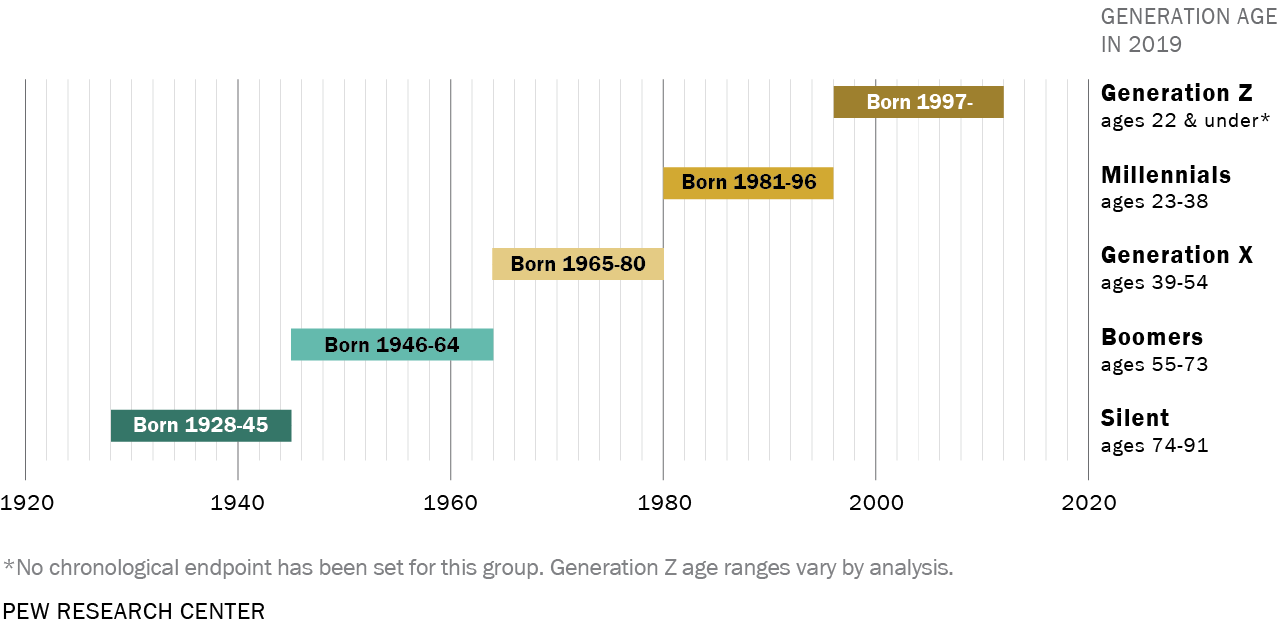

In [3]:
sp.display_foto("../images/Generations.png", 500)

In [30]:
import matplotlib.pyplot as plt

In [31]:
df[(df["Artist_Generation"]=="Generation X") & (df["Song_Decade"]=="1950s")] #esque la generacion de Elvis Presley (1935) deberia ser silent

,Highest_Charting_Position,Number_Of_Times_Charted,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Song_Id,Genre,Release_Date,...,Type,Country,Genre2,Genre1,Genre_Gen,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Artist_Generation,Song_Decade
883,62,4,2020-12-18,Blue Christmas,"6,007,011",Elvis Presley,5698788,3QiAAp20rPC3dcAtKtMaqQ,"[""['rock-and-roll'"", "" 'rockabilly']""]",1957-10-15,...,person,US,rockabilly,rock-and-roll,rock,December,Winter,2020,Generation X,1950s


assuming that every artist can create a song from birth to the present day, the clear mistake is generation X with songs from 1950

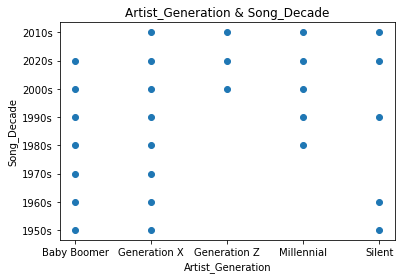

In [32]:
plt.scatter(Generacion["Artist_Generation"], Generacion["Song_Decade"])
plt.xlabel('Artist_Generation')
plt.ylabel('Song_Decade')
plt.title('Artist_Generation & Song_Decade')
plt.show()

In [33]:
df.loc[df['Artist'].isin(["Elvis Presley"]), 'Artist_Generation'] = "Silent"

In [34]:
df["Artist_Generation"][df["Artist"]=="Elvis Presley"]

883    Silent
Name: Artist_Generation, dtype: object

In [35]:
df.to_csv("../data/df_spotify6.csv")

## 3-  Dataset structure

In [148]:
df=pd.read_csv("../data/df_spotify6.csv", index_col = 0 )

In [149]:
df.head(1)

,Highest_Charting_Position,Number_Of_Times_Charted,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Song_Id,Genre,Release_Date,Weeks_Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Gender,Age,Type,Country,Genre2,Genre1,Genre_Gen,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Artist_Generation,Song_Decade
0,1,8,2021-07-23,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[""['indie rock italiano'"", "" 'italian pop']""]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560.0,0.589,B,mixed,4,group,IT,italian pop,indie rock italiano,rock,July,Summer,2021,Generation Z,2010s


In [150]:
borrar=["Highest_Charting_Position","Number_Of_Times_Charted", "Song_Id", "Genre", "Age", "Weeks_Charted"]

In [151]:
df.drop(borrar, axis = 1, inplace=True)

In [152]:
df.head(1)

,Week_Of_Highest_Charting,Song_Name,Streams,Artist,Artist_Followers,Release_Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Gender,Type,Country,Genre2,Genre1,Genre_Gen,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Artist_Generation,Song_Decade
0,2021-07-23,Beggin',"48,633,449",Måneskin,3377762,2017-12-08,100.0,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560.0,0.589,B,mixed,group,IT,italian pop,indie rock italiano,rock,July,Summer,2021,Generation Z,2010s


In [153]:
df.columns

Index(['Week_Of_Highest_Charting', 'Song_Name', 'Streams', 'Artist',
       'Artist_Followers', 'Release_Date', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Tempo', 'Duration_(Ms)', 'Valence', 'Chord', 'Gender', 'Type',
       'Country', 'Genre2', 'Genre1', 'Genre_Gen', 'Month_Highest_Charting',
       'Season_Highest_Charting', 'Year_Highest_Charting', 'Artist_Generation',
       'Song_Decade'],
      dtype='object')

In [154]:
df.shape

(1143, 28)

In [155]:
df=df.reindex(columns=['Song_Name','Genre_Gen', 'Genre1', 'Genre2','Release_Date', 'Song_Decade','Streams', 'Week_Of_Highest_Charting',
        'Month_Highest_Charting','Season_Highest_Charting','Year_Highest_Charting','Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Tempo', 'Duration_(Ms)', 'Valence', 'Chord','Artist','Artist_Followers', 'Gender', 'Artist_Generation','Type','Country'])

In [156]:
df.shape

(1143, 28)

In [157]:
df.head()

,Song_Name,Genre_Gen,Genre1,Genre2,Release_Date,Song_Decade,Streams,Week_Of_Highest_Charting,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Artist,Artist_Followers,Gender,Artist_Generation,Type,Country
0,Beggin',rock,indie rock italiano,italian pop,2017-12-08,2010s,"48,633,449",2021-07-23,July,Summer,2021,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.359,134.002,211560.0,0.589,B,Måneskin,3377762,mixed,Generation Z,group,IT
1,I WANNA BE YOUR SLAVE,rock,indie rock italiano,italian pop,2021-03-19,2020s,"24,551,591",2021-07-02,July,Summer,2021,95.0,0.750,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347.0,0.958,C#/Db,Måneskin,3377762,mixed,Generation Z,group,IT
2,ZITTI E BUONI,rock,indie rock italiano,italian pop,2021-03-19,2020s,"7,975,148",2021-05-28,May,Spring,2021,86.0,0.625,0.939,-3.115,0.0669,0.00138,0.424,102.999,194787.0,0.644,E,Måneskin,3377762,mixed,Generation Z,group,IT
3,CORALINE,rock,indie rock italiano,italian pop,2021-03-19,2020s,"5,241,813",2021-05-28,May,Spring,2021,81.0,0.363,0.678,-4.939,0.0995,0.02990,0.324,162.124,300413.0,0.321,D,Måneskin,3377762,mixed,Generation Z,group,IT
4,STAY (with Justin Bieber),hip hop,australian hip hop,NaN,2021-07-09,2020s,"47,248,719",2021-07-23,July,Summer,2021,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.103,169.928,141806.0,0.478,C#/Db,The Kid LAROI,2230022,male,Generation Z,person,AU


In [158]:
df.rename(columns = {"Genre_Gen": "Genre"}, inplace = True)
df.rename(columns = {"Genre1": "Subgenre"}, inplace = True)
df.rename(columns = {"Genre2": "Subgenre_2"}, inplace = True)

In [159]:
df_nul=pd.DataFrame((df.isnull().sum() * 100) / df.shape[0])
df_nul[df_nul[0]>0] #para el subgenre_2 es normal asique reemplazo los nulos por "-", los que son menor que 1 no son muchos asiqeu los borro

,0
Genre,0.524934
Subgenre_2,15.660542
Song_Decade,0.787402
Popularity,0.787402
Danceability,0.787402
Energy,0.787402
Loudness,0.787402
Speechiness,0.787402
Acousticness,0.787402
Liveness,0.787402


In [160]:
df['Subgenre_2'].fillna("-",inplace=True)

In [161]:
df = df.dropna(subset=["Popularity"])

In [162]:
df = df.dropna(subset=["Country"])

In [164]:
df = df.dropna(subset=["Genre"])

### 2.3.3.1  Gender Nul

In [165]:
df_nul=pd.DataFrame((df.isnull().sum() * 100) / df.shape[0])
df_nul[df_nul[0]>0]

,0
Gender,1.156584
Type,1.156584


In [167]:
null = df["Gender"].isnull()
df_null_g = df.loc[null, :]

In [168]:
df_null_g["Type"].unique()  

array([nan], dtype=object)

In [169]:
artist=df_null_g["Artist"].unique()
artist

array(['Giveon', 'Sleepy Hallow', 'Boza', 'Baby Keem', 'Rod Wave',
       'Fousheé', 'Nea', 'Juanfran', 'TOKYO’S REVENGE', 'Anne-Marie'],
      dtype=object)

In [171]:
import gender_guesser.detector as gender

In [172]:
guess={"Artist":[], "Gender":[], "Type":[]}
d = gender.Detector()
for name in artist:
        g=d.get_gender(name)
        guess["Artist"].append(name)
        guess["Gender"].append(g)
        guess["Type"].append("person")

In [173]:
df_guess=pd.DataFrame(guess)
df_guess[df_guess["Gender"]!="unknown"]

,Artist,Gender,Type
6,Nea,female,person
9,Anne-Marie,female,person


In [174]:
df.loc[df['Artist'].isin(["Anne-Marie", "Nea"]), 'Gender'] = "female"
df.loc[df['Artist'].isin(["Anne-Marie", "Nea"]), 'Type'] = "person"

In [175]:
df_nul=pd.DataFrame((df.isnull().sum() * 100) / df.shape[0])
df_nul[df_nul[0]>0] #menor que 1% asique me lo cargo

,0
Gender,0.88968
Type,0.88968


In [176]:
df = df.dropna(subset=["Gender"])

In [177]:
df=df.sort_values(by = ["Streams"], ascending=False).reset_index(drop=True)

In [178]:
df.head()

,Song_Name,Genre,Subgenre,Subgenre_2,Release_Date,Song_Decade,Streams,Week_Of_Highest_Charting,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Artist,Artist_Followers,Gender,Artist_Generation,Type,Country
0,UGH!,pop,k-pop,k-pop boy group,2020-02-21,2020s,"9,991,177",2020-02-21,February,Winter,2020,72.0,0.720,0.824,-5.086,0.1280,0.0394,0.0509,165.998,225012.0,0.333,A#/Bb,BTS,37151476,mixed,Generation Z,group,KR
1,Bigger Than Life,rap,melodic rap,philly rap,2020-03-06,2020s,"9,974,143",2020-03-06,March,Spring,2020,62.0,0.776,0.752,-4.711,0.1930,0.3250,0.3300,140.013,192705.0,0.716,G#/Ab,Lil Uzi Vert,11821805,male,Millennial,person,US
2,Time Flies,hip hop,canadian hip hop,canadian pop,2020-05-01,2020s,"9,904,749",2020-05-01,May,Spring,2020,71.0,0.864,0.477,-5.786,0.2240,0.2010,0.1820,86.460,192932.0,0.500,A#/Bb,Drake,56327031,male,Millennial,person,CA
3,HOT WIND BLOWS (feat. Lil Wayne),hip hop,hip hop,rap,2021-06-25,2020s,"9,889,197",2021-06-25,June,Summer,2021,77.0,0.371,0.750,-5.382,0.4020,0.6010,0.4820,173.456,155293.0,0.729,G,"Tyler, The Creator",6777818,male,Millennial,person,US
4,Wonderful Christmastime - Edited Version / Rem...,rock,album rock,art rock,1980-05-16,1980s,"9,882,989",2020-12-18,December,Winter,2020,51.0,0.774,0.511,-8.914,0.0319,0.3220,0.0672,94.736,227653.0,0.771,B,Paul McCartney,3609658,male,Baby Boomer,person,GB


In [179]:
df.to_csv("../data/df_spotify_limpio.csv")

In [37]:
df=sp.abrir_csv("../data/df_spotify_limpio.csv")
df.shape

(1114, 28)

In [180]:
df.describe(include = "object").T

,count,unique,top,freq
Song_Name,1114,1114,UGH!,1
Genre,1114,13,pop,259
Subgenre,1114,120,dance pop,193
Subgenre_2,1114,106,pop,200
Release_Date,1114,377,2020-01-17,33
Song_Decade,1114,8,2020s,835
Streams,1114,1114,"9,991,177",1
Week_Of_Highest_Charting,1114,83,2020-12-18,60
Month_Highest_Charting,1114,12,January,153
Season_Highest_Charting,1114,4,Winter,406


In [181]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year_Highest_Charting,1114.0,2020.211849,0.512208,2019.000000,2020.000000,2020.00000,2021.00000,2021.000
Popularity,1114.0,69.477558,15.713173,0.000000,64.000000,72.00000,79.00000,100.000
Danceability,1114.0,0.673791,0.144790,0.150000,0.584250,0.68500,0.78100,0.964
Energy,1114.0,0.620539,0.164983,0.054000,0.518250,0.63100,0.74075,0.966
Loudness,1114.0,-6.554244,2.543737,-25.166000,-7.660000,-6.18850,-4.90250,1.509
Speechiness,1114.0,0.121334,0.113938,0.023200,0.042625,0.07055,0.16000,0.884
Acousticness,1114.0,0.255119,0.265196,0.000025,0.046600,0.15200,0.39500,0.991
Liveness,1114.0,0.187071,0.152411,0.031100,0.097525,0.12400,0.21900,0.962
Tempo,1114.0,122.074383,29.154174,64.062000,97.695750,121.77700,142.06400,205.272
Duration_(Ms),1114.0,197328.744165,47485.244026,30133.000000,169250.250000,193337.00000,218618.00000,588139.000
